# Assignment 7: Arhat Shah

In [4]:
#imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [7]:
# read csv
diamonds_df = pd.read_csv('diamonds.csv')

# drop unnamed column
diamonds_df.drop('Unnamed: 0', axis=1, inplace=True)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## two var statistical summary

In [11]:
# depth statistical summary
print("depth statistical summary")
depth_summary = diamonds_df['depth'].describe()
# round to two dp
print(depth_summary.round(2))

print()
# carat statistical summary
print("carat statistical summary")
carat_summary = diamonds_df['carat'].describe()
# round to two dp
print(carat_summary.round(2))

depth statistical summary
count    53940.00
mean        61.75
std          1.43
min         43.00
25%         61.00
50%         61.80
75%         62.50
max         79.00
Name: depth, dtype: float64

carat statistical summary
count    53940.00
mean         0.80
std          0.47
min          0.20
25%          0.40
50%          0.70
75%          1.04
max          5.01
Name: carat, dtype: float64


### the depth summary shows that the median of the data (61.00) is very close to the mean(61.75), which is a good sign that the data is normally distributed. The data ranges from 43.00 to 79.00, with a standard deviation of 1.43.
### The carat summary shows that the median of the data (.70) is less than the mean (.80), showing that the data is right skewed. The data ranges from .02 to .05, with a standard deviation of .47.

## bar chart that shows the frequency of diamonds grouped by cut

Text(0, 0.5, 'Frequency')

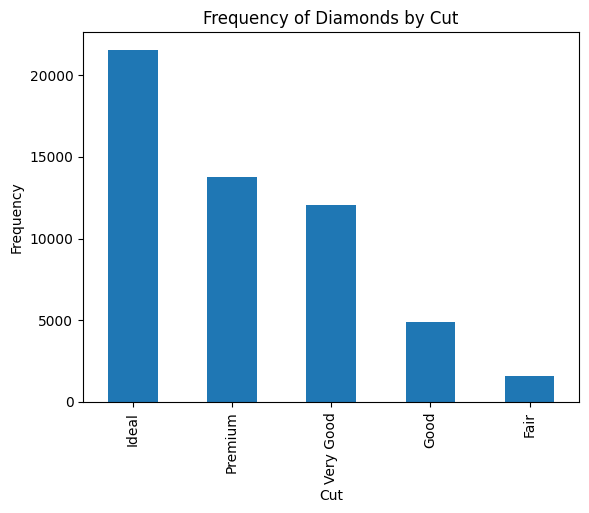

In [13]:
# create bar chart
diamonds_df.cut.value_counts().plot(kind='bar')

# label the graph
plt.title('Frequency of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Frequency')

### Based on the bar chart, the most common cut is Ideal, with over 20000 diamonds. It is followed by Premium, Very Good, Good, and Fair.

## Create a scatterplot that shows the relationship between carat and price

Text(0, 0.5, 'Price')

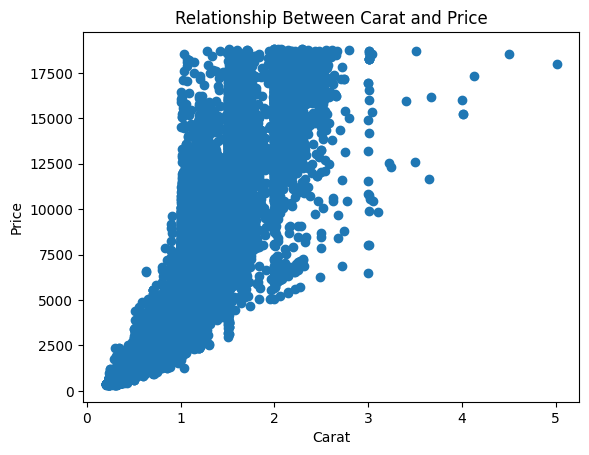

In [14]:
# make a scatterplot
plt.scatter(diamonds_df.carat, diamonds_df.price)

# label the graph
plt.title('Relationship Between Carat and Price')
plt.xlabel('Carat')
plt.ylabel('Price')

### It seems as there is a positive correlation between carat and price. As the carat increases, the price increases.

## Calculate the Pearson Correlation coefficient of carat and price

In [17]:
# find the p value of the pearson coefficient
results = pearsonr(diamonds_df['carat'], diamonds_df['price'])
print("pearson coefficient:", results.statistic.round(2))
print("p-value:", results.pvalue.round(2))

# find the pearson coefficient
pearson_coeff = diamonds_df['carat'].corr(diamonds_df['price'])
print("pearson coefficient of carat and price:", pearson_coeff.round(2))

pearson coefficient: 0.92
p-value: 0.0
pearson coefficient of carat and price: 0.92


### The Pearson Correlation coefficient of carat and price is 0.921591, which is a strong positive correlation. Additionally, the p-value is 0.00, which is less than 0.05, so we can reject the null hypothesis that there is no correlation between carat and price, and prove that our correlation is statistically significant.

## Box plot of the distribution of prices based on the quality of the cut

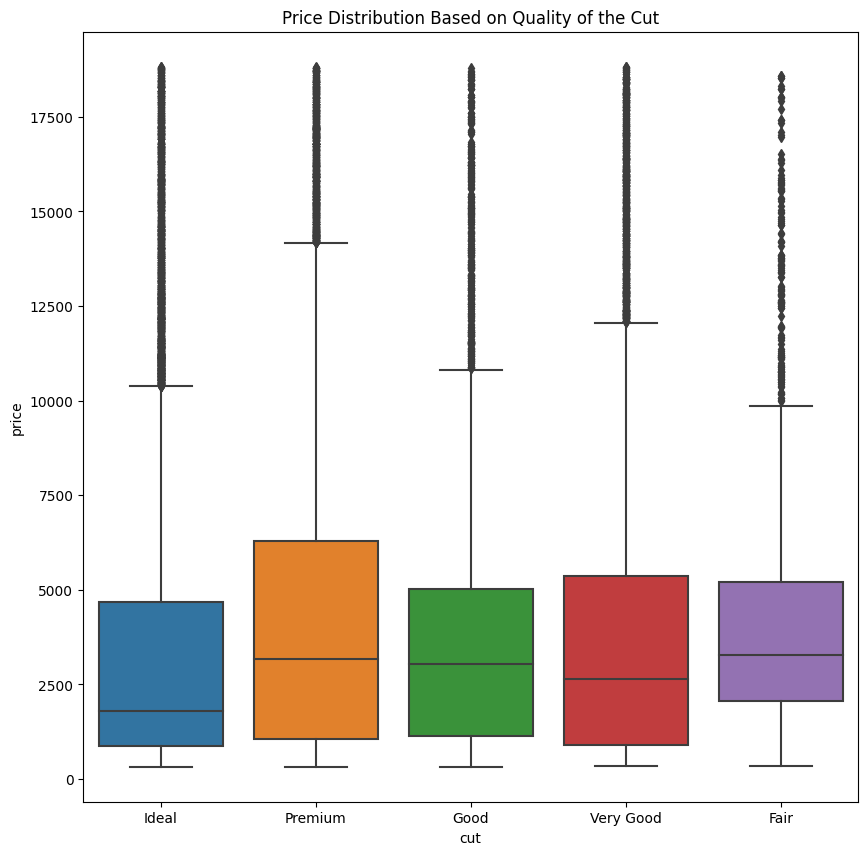

In [23]:
# create a boxplot with price distribution based on quality of cut 
plt.figure(figsize=(10,10))
sns.boxplot(x = diamonds_df["cut"], y = diamonds_df["price"])

plt.title('Price Distribution Based on Quality of the Cut')
plt.show()

### Based on the boxplots, we can determine that the Premium cut diamonds have the largest price distribution, and the highest median price. The Fair and Good diamonds have slightly lower median values than the Premium diamonds. The Very Good diamonds have a slightly lower median price than the the former two. The Ideal diamonds have the lowest median price.
### All of the boxplots are skewed right which shows that the data is positively skewed. This indicates that the mean is greater than the median for all. This can be further explained by the large amount of outliers in the data. The outliers are the diamonds that have a higher price than the rest of the data.

## Two sample t test

In [28]:
# 'good' vs 'very good'
sample_g = diamonds_df[diamonds_df['cut']=='Good']['price']
sample_vg = diamonds_df[diamonds_df['cut']=='Very Good']['price']

alpha = 0.05

good_vs_very_good = scipy.stats.ttest_ind(sample_g, sample_vg)

tval1 = good_vs_very_good.statistic
pval1 = good_vs_very_good.pvalue

print("good vs very good t-stat:", tval1.round(2))
print("good vs very good p-val:", pval1.round(2))

print()


# 'premium' vs 'ideal'
sample_p = diamonds_df[diamonds_df['cut']=='Premium']['price']
sample_i = diamonds_df[diamonds_df['cut']=='Ideal']['price']

alpha = 0.05

premium_vs_ideal = scipy.stats.ttest_ind(sample_p, sample_i)

tval2 = premium_vs_ideal.statistic
pval2 = premium_vs_ideal.pvalue
# print the rounded results
print("premium vs ideal t-stat:", tval2.round(2))
print("premium vs ideal p-value:", pval2.round(2))


good vs very good t-stat: -0.81
good vs very good p-val: 0.42

premium vs ideal t-stat: 25.65
premium vs ideal p-value: 0.0


### good vs very good: not a large statisctical difference between the two groups, as the t stat is very small(-.81), and the p-value is .42, which is greater than 0.05. Due to this, we can determine that the t stat is not statistically significant.

### premium vs ideal: a large statistical difference between the two groups, as the t stat is large (25.65), and the p-value is 0.00, which is less than 0.05. Due to this, we can determine that the t stat is statistically significant.